#1.Giới thiệu dataset và nêu bài toán cần giải quyết

* Dataset: Airline Passenger Satisfaction
* Source: (https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)
* Mục đích của tập dữ liệu: Bộ dữ liệu này chứa một cuộc khảo sát về mức độ hài lòng của hành khách hàng không. Những yếu tố nào có liên quan nhiều đến một hành khách hài lòng (hoặc không hài lòng)? Bạn có thể dự đoán mức độ hài lòng của hành khách không? **Đây là bài toán về phân loại mức độ hài lòng của khách hàng.**

#2.Chuẩn bị dữ liệu (Data Preparation)
Các vấn đề trong chuẩn bị dữ liệu
* Thăm dò dữ liệu
* Làm sạch dữ liệu
* Tích hợp dữ liệu
* Biến đổi, rời rạc hóa và chuẩn hóa dữ liệu
* Cân bằng dữ liệu
* Rút gọn thuộc tính
* ...

In [ ]:
%%capture
!pip install pandas-profiling

In [ ]:
%matplotlib inline

# Import các thư viện cần thiết
import os
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


<ipython-input-3-ed3cbdf07b01>:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
#Dowload data form drive
%%shell
pip -q install --upgrade --no-cache-dir gdown
gdown -q 15kjTzSa3ZboZ3MTWw2MvS7NHOD8BbJ-x
echo 'download: done => file: airline.zip'
rm -rf ./airline/
unzip -q airline.zip

download: done => file: airline.zip


In [ ]:
df = pd.read_csv('/content/train.csv')
df.head(n=10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
from tabulate import tabulate

missing_data = []
for col in df.columns:
    missing_count = df[col].isna().sum()
    missing_percent = missing_count / len(df) * 100
    missing_data.append([col, f"{missing_percent:.2f}%"])

print(tabulate(missing_data, headers=['Column', 'Missing Percentage'], tablefmt='psql'))


+-----------------------------------+----------------------+
| Column                            | Missing Percentage   |
|-----------------------------------+----------------------|
| Unnamed: 0                        | 0.00%                |
| id                                | 0.00%                |
| Gender                            | 0.00%                |
| Customer Type                     | 0.00%                |
| Age                               | 0.00%                |
| Type of Travel                    | 0.00%                |
| Class                             | 0.00%                |
| Flight Distance                   | 0.00%                |
| Inflight wifi service             | 0.00%                |
| Departure/Arrival time convenient | 0.00%                |
| Ease of Online booking            | 0.00%                |
| Gate location                     | 0.00%                |
| Food and drink                    | 0.00%                |
| Online boarding       

* 103904 dòng (rows, entries)
* 25 cột (columns, features, attributes)
* tên thuộc tính - số lượng giá trị tương ứng (nhìn vào đây có thể xác định tập dữ liệu có bị thiếu hay không)
* Kiểu dữ liệu

* dùng.isna().sum() để trả về những dữ liệu bị sót(value=NA) nếu có để kiểm tra tập dữ liệu có bị sót ko
* Qua đó chúng ta thấy được cột Arrival Delay in Minutes bị thiếu dữ liệu

In [ ]:
df.columns[df.isnull().any()]

Index(['Arrival Delay in Minutes'], dtype='object')

In [ ]:
df = df.dropna(subset=['Arrival Delay in Minutes'])

In [ ]:
from tabulate import tabulate

missing_data = []
for col in df.columns:
    missing_count = df[col].isna().sum()
    missing_percent = missing_count / len(df) * 100
    missing_data.append([col, f"{missing_percent:.2f}%"])

print(tabulate(missing_data, headers=['Column', 'Missing Percentage'], tablefmt='psql'))

+-----------------------------------+----------------------+
| Column                            | Missing Percentage   |
|-----------------------------------+----------------------|
| Unnamed: 0                        | 0.00%                |
| id                                | 0.00%                |
| Gender                            | 0.00%                |
| Customer Type                     | 0.00%                |
| Age                               | 0.00%                |
| Type of Travel                    | 0.00%                |
| Class                             | 0.00%                |
| Flight Distance                   | 0.00%                |
| Inflight wifi service             | 0.00%                |
| Departure/Arrival time convenient | 0.00%                |
| Ease of Online booking            | 0.00%                |
| Gate location                     | 0.00%                |
| Food and drink                    | 0.00%                |
| Online boarding       

kết quả sau khi đã xử lý dũ liệu missing

In [ ]:
df.select_dtypes(include = 'object').isnull().sum()

Gender            0
Customer Type     0
Type of Travel    0
Class             0
satisfaction      0
dtype: int64

In [ ]:
objects = df.select_dtypes(include = 'object')

In [ ]:
df[["Arrival Delay in Minutes"]].tail(10)

,Arrival Delay in Minutes
103894,26.0
103895,10.0
103896,0.0
103897,7.0
103898,0.0
103899,0.0
103900,0.0
103901,14.0
103902,0.0
103903,0.0


In [ ]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,51950.102274,64942.428625,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,29997.914016,37460.816597,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25960.250000,32562.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51955.500000,64890.000000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77924.750000,97370.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000



#### Visualization
Mặc dù chúng ta có rất nhiều công cụ hỗ trợ, tuy nhiên dữ liệu dạng bảng và các thống kê dưới dạng các con số cũng gây nhầm lẫn. Ở 1 số trường hợp, việc trực quan hóa rất quan trọng. Thư viện **matplotlib, seaborn** sẽ hỗ trợ chúng ta thực hiện. Dưới đây là một số ví dụ

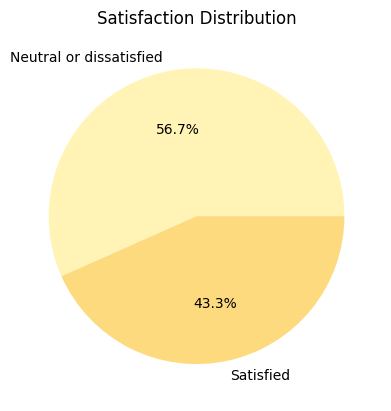

In [ ]:
plt.pie(df.satisfaction.value_counts(), labels=["Neutral or dissatisfied", "Satisfied"], colors=sns.color_palette("YlOrBr"), autopct='%1.1f%%')
plt.title("Satisfaction Distribution")
plt.show()

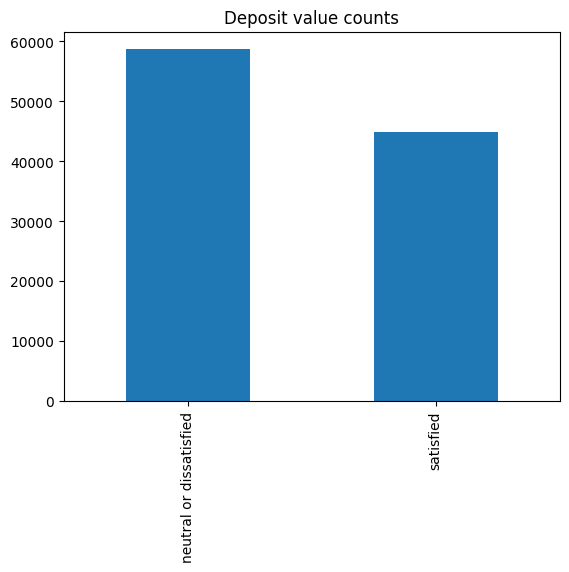

In [ ]:
# Phân bố giữa 2 nhóm: hài lòng và không hài lòng
value_counts = df['satisfaction'].value_counts()
value_counts.plot.bar(title = 'Deposit value counts')
plt.show()

Qua 2 biểu đồ trên ta thấy được số lượng người không hài lòng chiếm tỉ lệ cao hơn

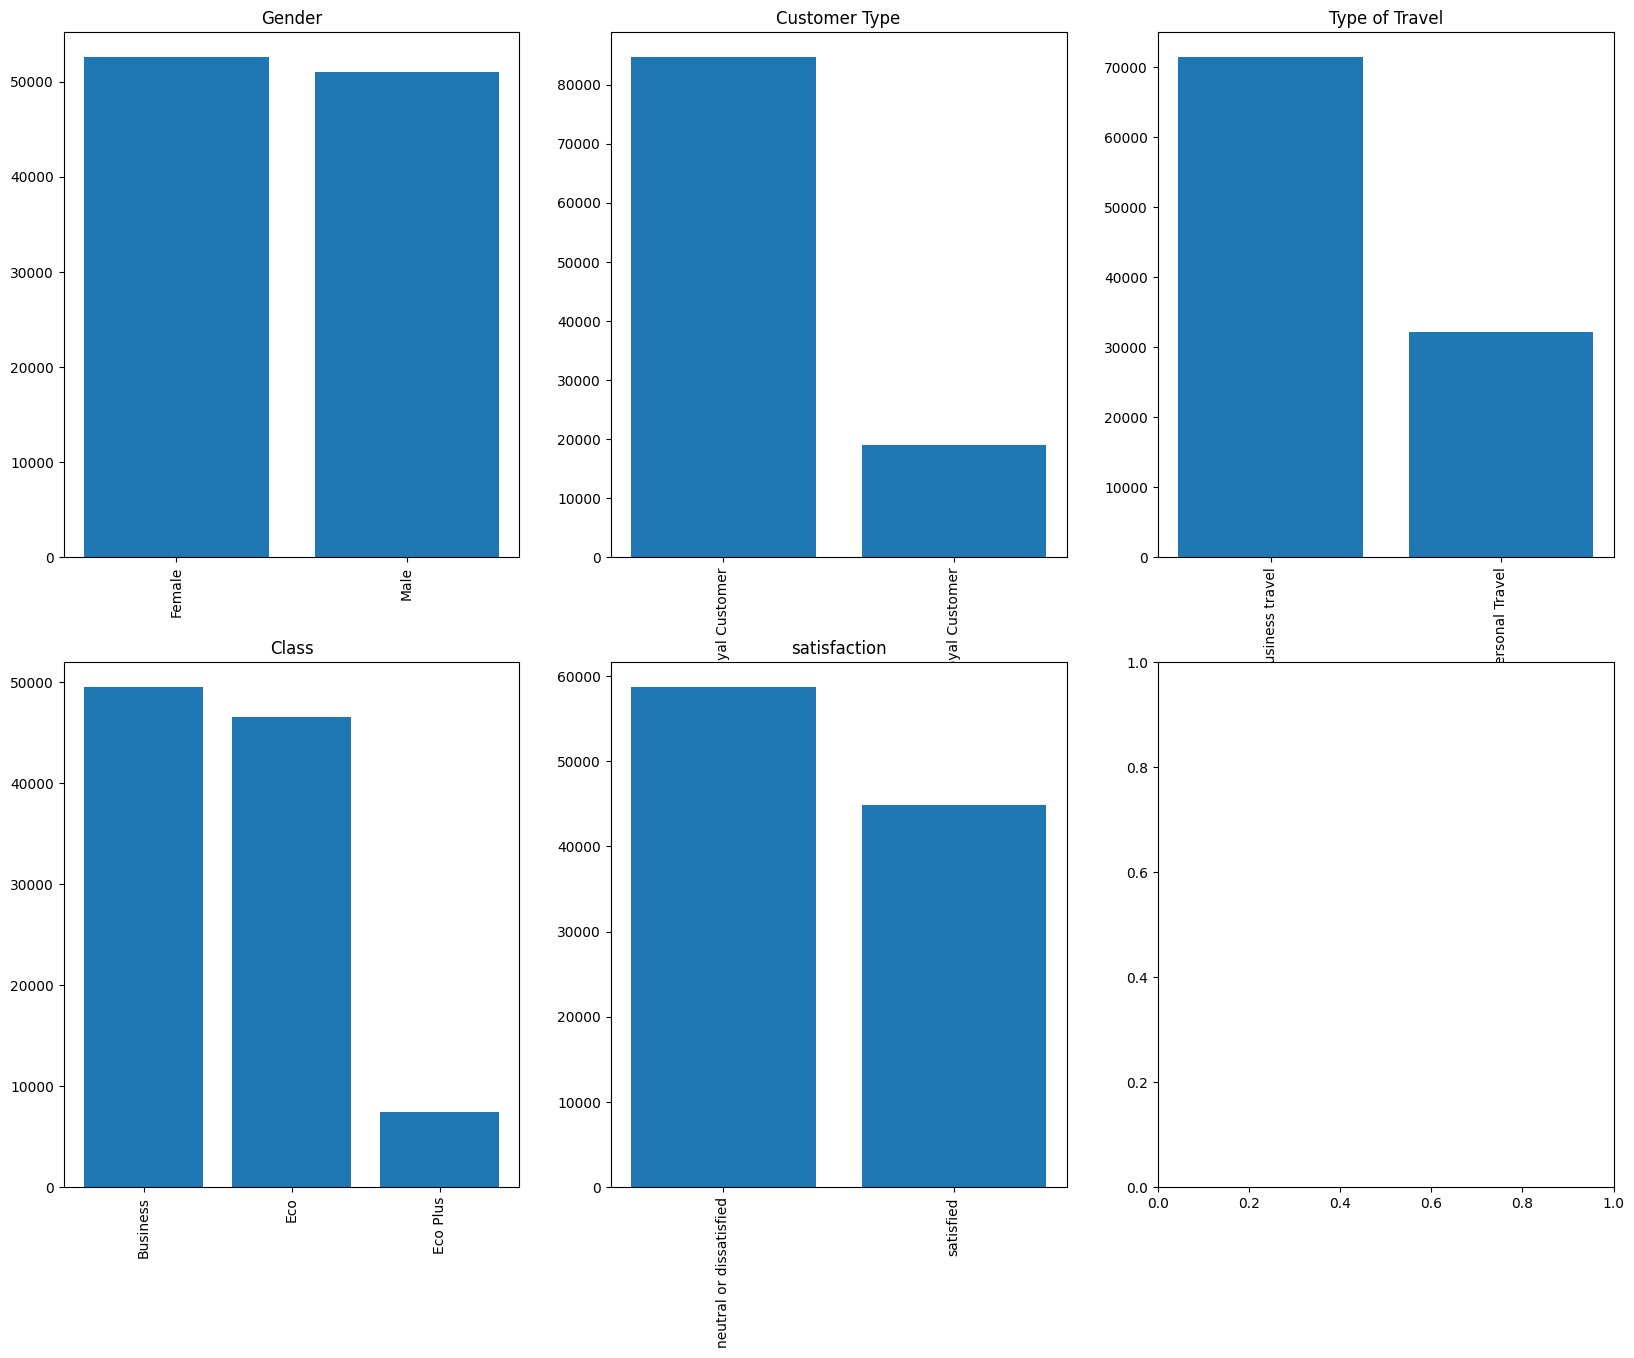

In [ ]:
"""
    Xem thử phân bố của các cột dữ liệu có kiểu categorical
"""
cat_columns = [
    'Gender',
    'Customer Type',
    'Type of Travel',
    'Class',
    'satisfaction'
]

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()

    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))

    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)

    axs[trace_x, trace_y].set_title(cat_column)

    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)

    counter += 1

plt.show()

### 2.2. Làm sạch dữ liệu
Dựa vào tình hình của việc thăm dò dữ liệu, cũng như mô hình dự kiến và nền tảng hiện thực, chúng ta sẽ tiến hành làm sạch dữ liệu

* Do tập dữ liệu này bị thiếu ở cột ->cần xử lý dữ liệu thiếu
* Mặc dù mô hình dự kiến là Decision tree làm việc khá tốt với dữ liệu categorical. Tuy nhiên thư viện sklearn chỉ nhận input data dưới dạng số -> cần mã hóa (encode) dữ liệu

In [ ]:
x = df.iloc[:,:-1].values

In [ ]:
x

array([[0, 70172, 'Male', ..., 5, 25, 18.0],
       [1, 5047, 'Male', ..., 1, 1, 6.0],
       [2, 110028, 'Female', ..., 5, 0, 0.0],
       ...,
       [103901, 68825, 'Male', ..., 4, 7, 14.0],
       [103902, 54173, 'Female', ..., 1, 0, 0.0],
       [103903, 62567, 'Male', ..., 1, 0, 0.0]], dtype=object)

In [ ]:
y = df.iloc[:,24].values

In [ ]:
y

array(['neutral or dissatisfied', 'neutral or dissatisfied', 'satisfied',
       ..., 'neutral or dissatisfied', 'neutral or dissatisfied',
       'neutral or dissatisfied'], dtype=object)

In [ ]:
def get_dummy_from_bool(row, column_name):
    ''' Returns 0 if value in column_name is neutral or dissatisfied, returns 1 if value in column_name is satisfied'''
    return 1 if row[column_name] == 'neutral or dissatisfied' else 0

def get_correct_values(row, column_name, threshold, df):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(df):
    cleaned_df = df.copy()
    bool_columns = ['satisfaction']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)

    cleaned_df = cleaned_df.drop(columns = bool_columns)

    #convert categorical columns to dummies
    cat_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)

    #drop irrelevant columns


    #impute incorrect values and drop original columns

    return cleaned_df

In [ ]:
cleaned_df = clean_data(df)
cleaned_df.head()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_bool,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0,70172,13,460,3,4,3,1,5,3,...,5,5,25,18.0,1,1,0,1,0,1
1,1,5047,25,235,3,2,3,3,1,3,...,4,1,1,6.0,1,1,1,0,0,0
2,2,110028,26,1142,2,2,2,2,5,5,...,4,5,0,0.0,0,0,0,0,0,0
3,3,24026,25,562,2,5,5,5,2,2,...,4,2,11,9.0,1,0,0,0,0,0
4,4,119299,61,214,3,3,3,3,4,5,...,3,3,0,0.0,0,1,0,0,0,0


In [ ]:
X = cleaned_df.drop(columns = 'satisfaction_bool')
y = cleaned_df[['satisfaction_bool']]


print(X.shape)
print(y.shape)

(103594, 25)
(103594, 1)


In [ ]:
X = np.array(X)

In [ ]:
X

array([[0.00000e+00, 7.01720e+04, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.00000e+00, 5.04700e+03, 2.50000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.00000e+00, 1.10028e+05, 2.60000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.03901e+05, 6.88250e+04, 3.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.03902e+05, 5.41730e+04, 2.20000e+01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.03903e+05, 6.25670e+04, 2.70000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [ ]:
y = np.array(y).reshape(-1)

In [ ]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
X.shape, y.shape

((103594, 25), (103594,))

#3.Lựa chọn mô hình
Sử dụng Pipline được tạo ra bên dưới để thực hiện huấn luyện

#4.Huấn luyện mô hình
Tập dữ liệu được chia thành 2 phần **train** và **test** với tỉ lệ 7-3 và được huấn luyện bằng thư viện sklearn.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (82875, 25)
X_test shape:  (20719, 25)
y_train shape:  (82875,)
y_test shape:  (20719,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV

def generate_pipes(pipe_config):
  pipe_config = [list(step.items()) for _, step in pipe_config]
  pipe_config = list(itertools.product(*pipe_config))
  pipe_names = list(map(lambda steps: [name for name,_ in steps], pipe_config))
  pipe_names = list(map(lambda L: ">".join(L), pipe_names))
  pipes = [Pipeline(cfg) for cfg in pipe_config]
  return dict(zip(pipe_names, pipes))



def find_hyperparams(pipe_mapper):
  print("Start the tunning process ...")
  best_pipes = {}
  results = []
  for idx, pipe_name in enumerate(list(pipe_mapper.keys())):
    print(f"{idx + 1}. Tuning pipe: {pipe_name}")

    # Select parameters related to the current pipeline:
    param_distributions = {}
    for step_name in pipe_name.split('>'):
      for param_name in parameters.keys():
        if param_name.startswith(step_name):
          param_distributions[param_name] = parameters[param_name]

    # Create a finder and search for the best parameters using RandomizedSearchCV
    pipe = pipe_mapper[pipe_name]
    finder = RandomizedSearchCV(pipe, param_distributions=param_distributions, cv=5,
                                scoring="accuracy", refit=True, n_iter=4)

    finder.fit(X_train, y_train)
    print("\t best-params: {:>15s}".format(str(finder.best_params_)))
    print(f"\t best-score (accuracy): {finder.best_score_:15.2f}")
    print()

    # Store best pipe
    best_pipes[pipe_name] = finder.best_estimator_

    # Add results to a dataframe
    rs_item = {"Method": pipe_name, "Accuracy": finder.best_score_}
    for key, value in finder.best_params_.items():
      rs_item[key] = value
    results.append(rs_item)

  print("The tunning is done!")
  tuned_table = pd.DataFrame(results)
  tuned_table.set_index('Method')
  return tuned_table, best_pipes


## 2.2- Define pipeplines







In [ ]:
# Define methods for scaling features
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "MaxAbsScaler": MaxAbsScaler(),
}
reducers = {
    'PCA': PCA()
}

# Define methods for classifying samples
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=3000),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "SVC": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

pipe_steps = [
    ('scaler', scalers),
    ('reducers', reducers),
    ('classifier', classifiers)
]

# Define parameters for each method
parameters = {
    "MinMaxScaler__feature_range": [(0, 1), (-1, 1)],
    "StandardScaler__with_mean": [True, False],
    "StandardScaler__with_std": [True, False],
    "SVC__kernel": ['rbf', 'linear'],
    "MLPClassifier__hidden_layer_sizes": [(50,), (100,)],
    "MLPClassifier__activation": ['relu'],
    "DecisionTreeClassifier__criterion": ['entropy'],
    "RandomForestClassifier__n_estimators": [50, 100],
    "RandomForestClassifier__criterion": ['entropy'],
    "PCA__n_components": [0.90, 0.95]
}


## 2.3- Tune hyper-parameters

In [ ]:
pipe_mapper = generate_pipes(pipe_steps)
tuned_table, best_pipes = find_hyperparams(pipe_mapper)

Start the tunning process ...
1. Tuning pipe: MinMaxScaler>PCA>LogisticRegression
	 best-params: {'PCA__n_components': 0.95, 'MinMaxScaler__feature_range': (-1, 1)}
	 best-score (accuracy):            0.87

2. Tuning pipe: MinMaxScaler>PCA>MLPClassifier
	 best-params: {'PCA__n_components': 0.95, 'MinMaxScaler__feature_range': (0, 1), 'MLPClassifier__hidden_layer_sizes': (100,), 'MLPClassifier__activation': 'relu'}
	 best-score (accuracy):            0.95

3. Tuning pipe: MinMaxScaler>PCA>SVC
	 best-params: {'SVC__kernel': 'rbf', 'PCA__n_components': 0.95, 'MinMaxScaler__feature_range': (-1, 1)}
	 best-score (accuracy):            0.94

4. Tuning pipe: MinMaxScaler>PCA>DecisionTreeClassifier
	 best-params: {'PCA__n_components': 0.9, 'MinMaxScaler__feature_range': (0, 1), 'DecisionTreeClassifier__criterion': 'entropy'}
	 best-score (accuracy):            0.89

5. Tuning pipe: MinMaxScaler>PCA>RandomForestClassifier
	 best-params: {'RandomForestClassifier__n_estimators': 100, 'RandomFores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=4. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


	 best-params: {'PCA__n_components': 0.95}
	 best-score (accuracy):            0.87

7. Tuning pipe: MaxAbsScaler>PCA>MLPClassifier
	 best-params: {'PCA__n_components': 0.95, 'MLPClassifier__hidden_layer_sizes': (100,), 'MLPClassifier__activation': 'relu'}
	 best-score (accuracy):            0.95

8. Tuning pipe: MaxAbsScaler>PCA>SVC
	 best-params: {'SVC__kernel': 'rbf', 'PCA__n_components': 0.95}
	 best-score (accuracy):            0.94

9. Tuning pipe: MaxAbsScaler>PCA>DecisionTreeClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=4. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


	 best-params: {'PCA__n_components': 0.9, 'DecisionTreeClassifier__criterion': 'entropy'}
	 best-score (accuracy):            0.89

10. Tuning pipe: MaxAbsScaler>PCA>RandomForestClassifier
	 best-params: {'RandomForestClassifier__n_estimators': 50, 'RandomForestClassifier__criterion': 'entropy', 'PCA__n_components': 0.95}
	 best-score (accuracy):            0.93

The tunning is done!


In [ ]:
# Save to file
tuned_table.to_csv("tuned_results.csv", sep=";")

#5.Đánh giá mô hình

In [ ]:
# Đọc dữ liệu
tuned_results = pd.read_csv("/content/tuned_results.csv", delimiter=';')
tuned_results

,Unnamed: 0,Method,Accuracy,PCA__n_components,MinMaxScaler__feature_range,MLPClassifier__hidden_layer_sizes,MLPClassifier__activation,SVC__kernel,DecisionTreeClassifier__criterion,RandomForestClassifier__n_estimators,RandomForestClassifier__criterion
0,0,MinMaxScaler>PCA>LogisticRegression,0.873617,0.95,"(-1, 1)",NaN,NaN,NaN,NaN,NaN,NaN
1,1,MinMaxScaler>PCA>MLPClassifier,0.945243,0.95,"(0, 1)","(100,)",relu,NaN,NaN,NaN,NaN
2,2,MinMaxScaler>PCA>SVC,0.938510,0.95,"(-1, 1)",NaN,NaN,rbf,NaN,NaN,NaN
3,3,MinMaxScaler>PCA>DecisionTreeClassifier,0.888543,0.90,"(0, 1)",NaN,NaN,NaN,entropy,NaN,NaN
4,4,MinMaxScaler>PCA>RandomForestClassifier,0.927360,0.95,"(-1, 1)",NaN,NaN,NaN,NaN,100.0,entropy
5,5,MaxAbsScaler>PCA>LogisticRegression,0.873701,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,MaxAbsScaler>PCA>MLPClassifier,0.946413,0.95,NaN,"(100,)",relu,NaN,NaN,NaN,NaN
7,7,MaxAbsScaler>PCA>SVC,0.937400,0.95,NaN,NaN,NaN,rbf,NaN,NaN,NaN
8,8,MaxAbsScaler>PCA>DecisionTreeClassifier,0.888712,0.90,NaN,NaN,NaN,NaN,entropy,NaN,NaN
9,9,MaxAbsScaler>PCA>RandomForestClassifier,0.926214,0.95,NaN,NaN,NaN,NaN,NaN,50.0,entropy


Bảng trên là bảng tổng hợp kết quả tuning của pipeline

In [ ]:
# Best pipeline:
tuned_table[tuned_table["Accuracy"] == tuned_table["Accuracy"].max()].dropna(axis=1)

,Method,Accuracy,PCA__n_components,MLPClassifier__hidden_layer_sizes,MLPClassifier__activation
6,MaxAbsScaler>PCA>MLPClassifier,0.946413,0.95,"(100,)",relu


Thực hiện lấy kết quả tôt nhất của pipeline


In [ ]:
# Show the selected pipe
selected_pipe_name = tuned_table.Method[tuned_table["Accuracy"].argmax()]
print(f"Name of the best pipe: {selected_pipe_name}")
selected_pipe = best_pipes[selected_pipe_name]


Name of the best pipe: MaxAbsScaler>PCA>MLPClassifier


In [ ]:
from sklearn.metrics import classification_report

print("Start the evaluation process ...")
y_pred = selected_pipe.predict(X_test)
print(classification_report(y_test, y_pred))
print("The evaluation is done!")

Start the evaluation process ...
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9064
           1       0.95      0.96      0.96     11655

    accuracy                           0.95     20719
   macro avg       0.95      0.95      0.95     20719
weighted avg       0.95      0.95      0.95     20719

The evaluation is done!
